# Multi-Class Prediction of Cirrhosis Outcomes
    Playground Series - Season 3, Episode 26


* Task is to use a multi-class approach to predict the the outcomes of patients with cirrhosis.


### Dataset  Information

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Cirrhosis Patient Survival Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

<img src="../data/data_fields.png">

**Files**

**train.csv** - the training dataset
* `Status` is the categorical target
* `C` (censored) indicates the patient was alive at `N_Days`
* `CL` indicates the patient was alive at `N_Days` due to liver a transplant
* `D` indicates the patient was deceased at `N_Days`

**test.csv** - the test dataset; your objective is to predict the probability of each of the three Status values, e.g., `Status_C`, `Status_CL`, `Status_D`.

**sample_submission.csv** - a sample submission file in the correct format

In [5]:
# Importing required libraries
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [10, 7]

from sklearn.model_selection import train_test_split


In [6]:
# Importing the dataset
train = pd.read_csv('../data/train.csv')
train.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,0,999,D-penicillamine,21532,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D
1,1,2574,Placebo,19237,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C
2,2,3428,Placebo,13727,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D
3,3,2576,Placebo,18460,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C
4,4,788,Placebo,16658,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C


In [7]:
# Importing the test dataset
test = pd.read_csv("../data/test.csv")
test.head()

,id,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,7905,3839,D-penicillamine,19724,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0
1,7906,2468,D-penicillamine,14975,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0
2,7907,51,Placebo,13149,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0
3,7908,2330,D-penicillamine,20510,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0
4,7909,1615,D-penicillamine,21904,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0


**Here the target variable is `Stage`**

In [8]:
# Get the information about the data
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             7905 non-null   int64  
 1   N_Days         7905 non-null   int64  
 2   Drug           7905 non-null   object 
 3   Age            7905 non-null   int64  
 4   Sex            7905 non-null   object 
 5   Ascites        7905 non-null   object 
 6   Hepatomegaly   7905 non-null   object 
 7   Spiders        7905 non-null   object 
 8   Edema          7905 non-null   object 
 9   Bilirubin      7905 non-null   float64
 10  Cholesterol    7905 non-null   float64
 11  Albumin        7905 non-null   float64
 12  Copper         7905 non-null   float64
 13  Alk_Phos       7905 non-null   float64
 14  SGOT           7905 non-null   float64
 15  Tryglicerides  7905 non-null   float64
 16  Platelets      7905 non-null   float64
 17  Prothrombin    7905 non-null   float64
 18  Stage   

In [9]:
# Remove the id column
train = train.drop('id', axis=1)
test = test.drop('id', axis=1)

In [10]:
print(f"Total number of columns in our dataset: {len(train.columns)}")
print(f"Total samples in our dataset: {len(train)}")

Total number of columns in our dataset: 19
Total samples in our dataset: 7905


In [11]:
# Get the descriptive statistics of our dataset
train.describe()

,N_Days,Age,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
count,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000,7905.000000
mean,2030.173308,18373.146490,2.594485,350.561923,3.548323,83.902846,1816.745250,114.604602,115.340164,265.228969,10.629462,3.032511
std,1094.233744,3679.958739,3.812960,195.379344,0.346171,75.899266,1903.750657,48.790945,52.530402,87.465579,0.781735,0.866511
min,41.000000,9598.000000,0.300000,120.000000,1.960000,4.000000,289.000000,26.350000,33.000000,62.000000,9.000000,1.000000
25%,1230.000000,15574.000000,0.700000,248.000000,3.350000,39.000000,834.000000,75.950000,84.000000,211.000000,10.000000,2.000000
50%,1831.000000,18713.000000,1.100000,298.000000,3.580000,63.000000,1181.000000,108.500000,104.000000,265.000000,10.600000,3.000000
75%,2689.000000,20684.000000,3.000000,390.000000,3.770000,102.000000,1857.000000,137.950000,139.000000,316.000000,11.000000,4.000000
max,4795.000000,28650.000000,28.000000,1775.000000,4.640000,588.000000,13862.400000,457.250000,598.000000,563.000000,18.000000,4.000000


In [12]:
# Gather information about how many categorical and numerical columns are there in dataset
numerical_cols = list(train.select_dtypes(exclude='object').columns)
categorical_cols = list(train.select_dtypes(include="object").columns)

print(f"There are {len(numerical_cols)} numerical columns in our dataset")
print(f"They are {numerical_cols}")

print(f"There are {len(categorical_cols)} categorical columns in our dataset")
print(f"They are {categorical_cols}")

There are 12 numerical columns in our dataset
They are ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
There are 7 categorical columns in our dataset
They are ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Status']


Let's find our how many `unique` values are there in our dataset

In [13]:
for col in categorical_cols:
    print(f"Number of unique values in {col} are {len(train[col].unique())}. \n They are {train[col].unique()}")

Number of unique values in Drug are 2. 
 They are ['D-penicillamine' 'Placebo']
Number of unique values in Sex are 2. 
 They are ['M' 'F']
Number of unique values in Ascites are 2. 
 They are ['N' 'Y']
Number of unique values in Hepatomegaly are 2. 
 They are ['N' 'Y']
Number of unique values in Spiders are 2. 
 They are ['N' 'Y']
Number of unique values in Edema are 3. 
 They are ['N' 'Y' 'S']
Number of unique values in Status are 3. 
 They are ['D' 'C' 'CL']


In [14]:
# Convert age column from days to years
age_years = train["Age"]//365

# Remove the age column containing days
# Add the age column back in years
train["Age"] = age_years

In [15]:
# Convert the N_Days column to years
n_days_years = round(train["N_Days"]/365, 1)

# Remove the n_days column
train.drop("N_Days", axis=1, inplace=True)

train["N_Days_Years"] = n_days_years

In [16]:
train.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status,N_Days_Years
0,D-penicillamine,58,M,N,N,N,N,2.3,316.0,3.35,172.0,1601.0,179.80,63.0,394.0,9.7,3.0,D,2.7
1,Placebo,52,F,N,N,N,N,0.9,364.0,3.54,63.0,1440.0,134.85,88.0,361.0,11.0,3.0,C,7.1
2,Placebo,37,F,N,Y,Y,Y,3.3,299.0,3.55,131.0,1029.0,119.35,50.0,199.0,11.7,4.0,D,9.4
3,Placebo,50,F,N,N,N,N,0.6,256.0,3.50,58.0,1653.0,71.30,96.0,269.0,10.7,3.0,C,7.1
4,Placebo,45,F,N,Y,N,N,1.1,346.0,3.65,63.0,1181.0,125.55,96.0,298.0,10.6,4.0,C,2.2


Let's make a preprocessing function to modify the test dataaset


In [17]:
def preprocess_data(df:pd.DataFrame) -> pd.DataFrame:
    
    # Convert age column from days to years
    age_years = df["Age"]//365

    # Remove the age column containing days
    # Add the age column back in years
    df["Age"] = age_years
    

    # Convert the N_Days column to years
    n_days_years = round(df["N_Days"]/365, 1)

    # Remove the n_days column
    df.drop("N_Days", axis=1, inplace=True)

    df["N_Days_Years"] = n_days_years
    
    return df

In [18]:
test_modified = preprocess_data(test)
test_modified.head()

,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,N_Days_Years
0,D-penicillamine,54,F,N,Y,N,N,1.2,546.0,3.37,65.0,1636.0,151.90,90.0,430.0,10.6,2.0,10.5
1,D-penicillamine,41,F,N,N,N,N,1.1,660.0,4.22,94.0,1257.0,151.90,155.0,227.0,10.0,2.0,6.8
2,Placebo,36,F,N,Y,N,Y,2.0,151.0,2.96,46.0,961.0,69.75,101.0,213.0,13.0,4.0,0.1
3,D-penicillamine,56,F,N,N,N,N,0.6,293.0,3.85,40.0,554.0,125.55,56.0,270.0,10.6,2.0,6.4
4,D-penicillamine,60,F,N,Y,N,N,1.4,277.0,2.97,121.0,1110.0,125.00,126.0,221.0,9.8,1.0,4.4


## Data Visualization

We'll plot some graphs to extract some insights from our dataset


### Univariate Analysis


**N_Days Column**

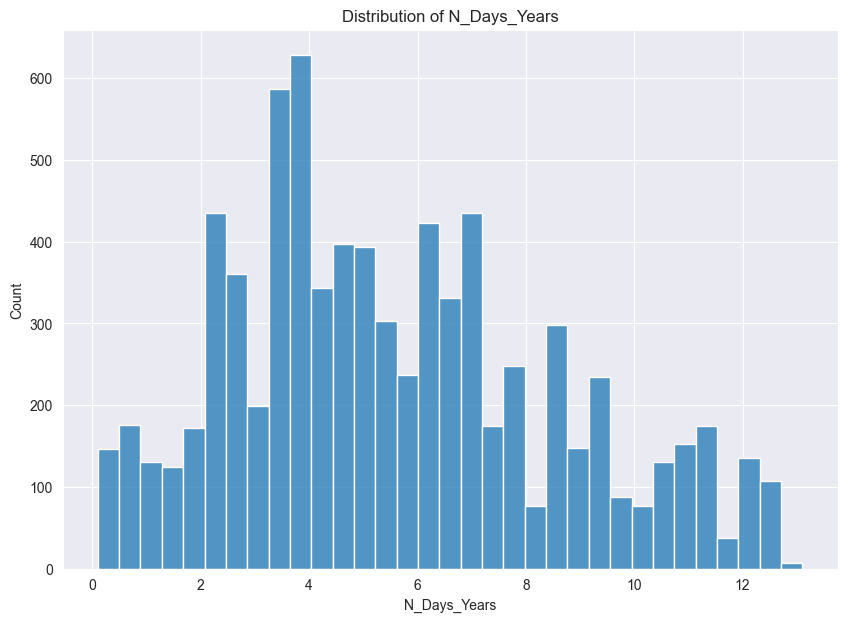

In [19]:
sns.histplot(train["N_Days_Years"])
plt.title("Distribution of N_Days_Years")
plt.show()

**Drug Column**

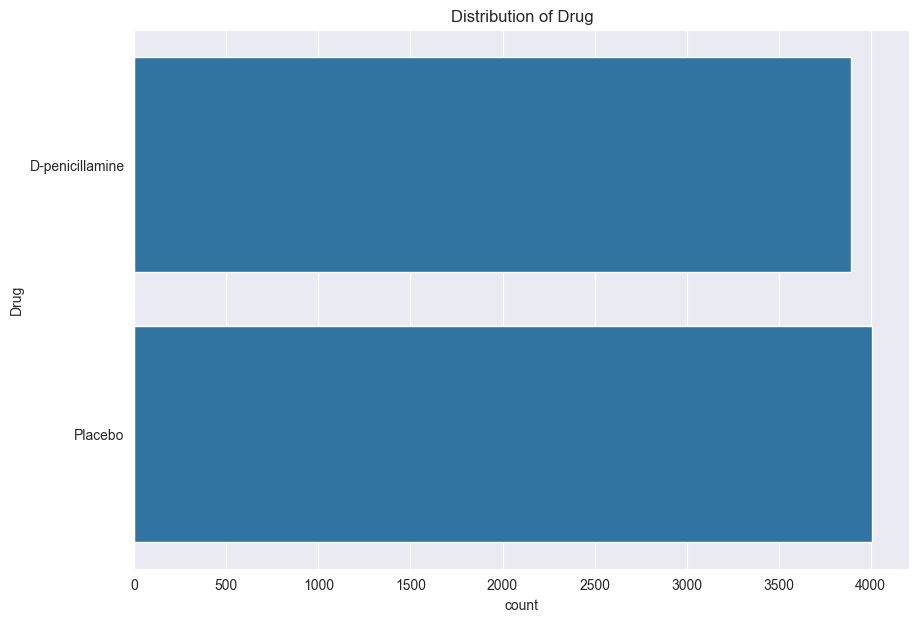

In [20]:
sns.countplot(train["Drug"])
plt.title("Distribution of Drug")
plt.show()

**Age Column**



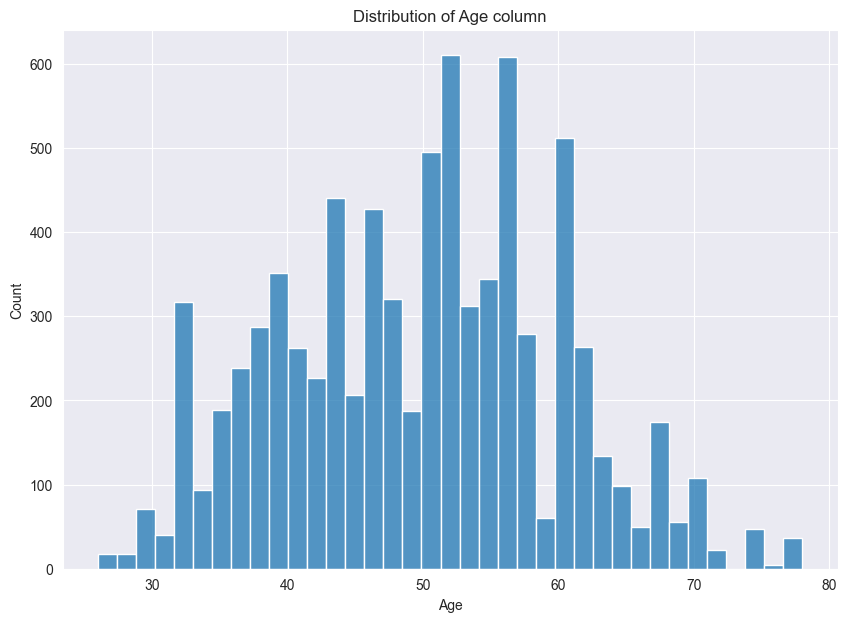

In [21]:
sns.histplot(train["Age"])
plt.title("Distribution of Age column")
plt.show()

**Hepatomegaly** 

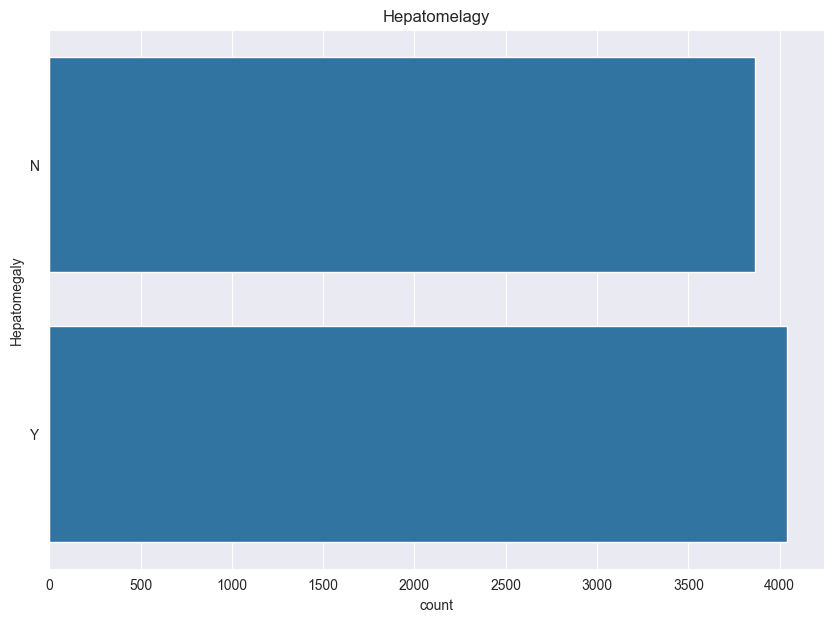

In [22]:
sns.countplot(train["Hepatomegaly"])
plt.title("Hepatomelagy")
plt.show()

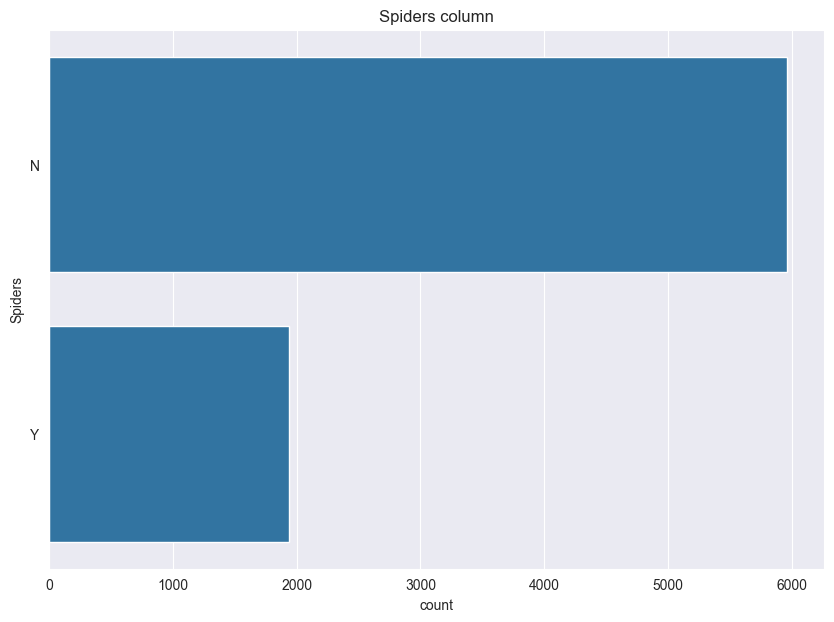

In [23]:
sns.countplot(train["Spiders"])
plt.title("Spiders column")
plt.show()

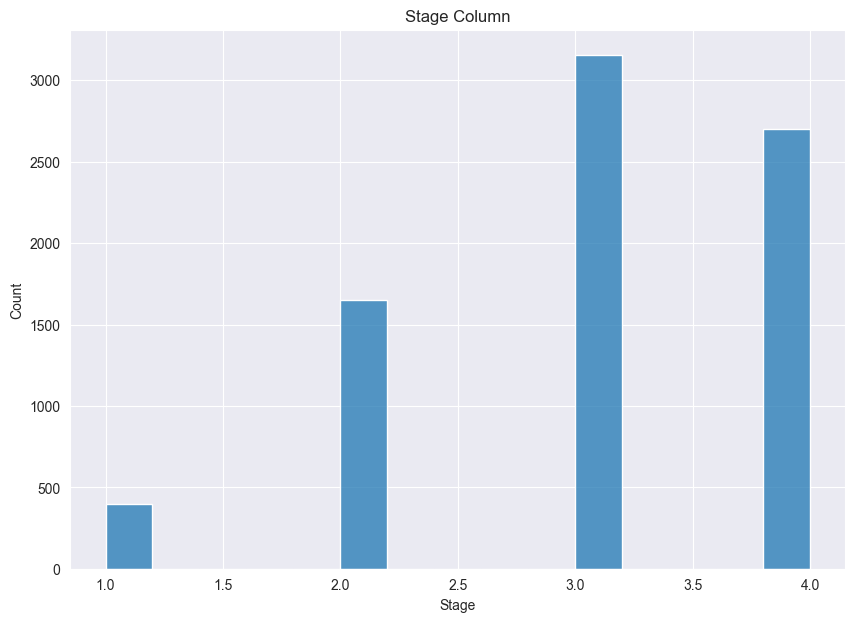

In [24]:
sns.histplot(train["Stage"])
plt.title("Stage Column")
plt.show()

## Get the correlation matrix

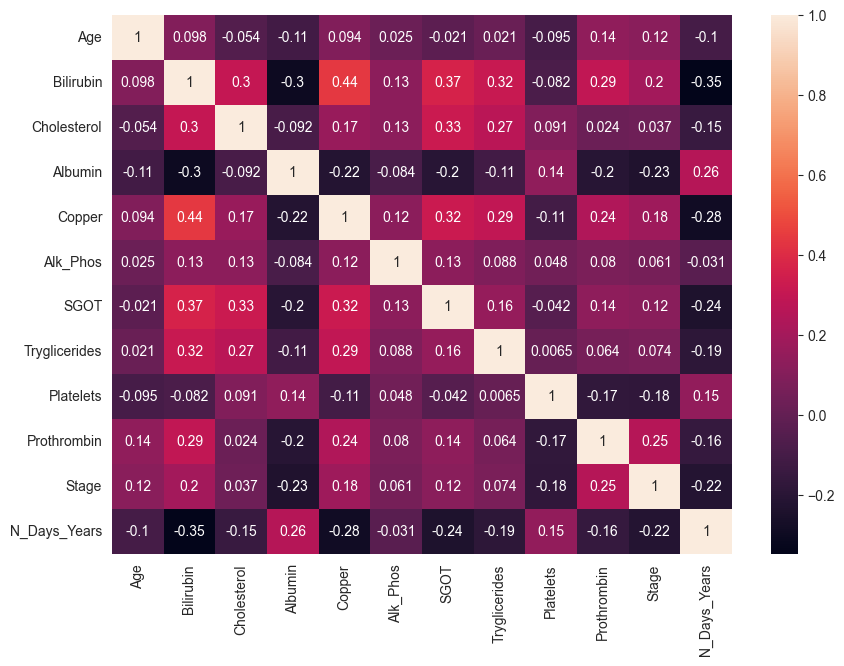

In [25]:
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True)
plt.show()

#### Save the modified dataset to the disk

In [27]:
train.to_csv("../data/train_modified.csv", index=False, header=True)
test_modified.to_csv("../data/test_modified.csv", index=False, header=True)